In [ ]:
library(MAESTRO)
library(chromVAR)
library(Seurat)
library(Matrix)
# library(BSgenome.Hsapiens.UCSC.hg19)
# library(BSgenome.Hsapiens.UCSC.hg38)
library(BiocParallel)
library(motifmatchr)
library(SummarizedExperiment)
library(rhdf5)
library(dplyr)
library(motifmatchr)
# library(chromVARmotifs)
# library(JASPAR2016)

library(ggplot2)
# library(spam)
# library(VennDiagram)
library(stringr)
# library(ggrepel)
# library(ggsignif)
library(qs)
register(MulticoreParam(8))

In [ ]:
destination = 'example/PBMC/data/ATAC/filtered_mtx'

# PBMC

In [2]:
pbmc_inputMat <- Read10X_h5('example/PBMC/data/ATAC/filtered_mtx/PBMC_granulocyte_sorted_10k_filtered_peak_count.h5')

Warning message in sparseMatrix(i = indices[] + 1, p = indptr[], x = as.numeric(x = counts[]), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"


In [ ]:
pbmc_inputMat

## ATAC-seq analysis

In [5]:
# pbmc_RNA_object <- readRDS('example/PBMC/data/PBMC_granulocyte_sorted_10k_scRNA_Object.rds')

In [15]:
# rna_bc <- rownames(pbmc_RNA_object$RNA@meta.data)

# key = read.table('example/PBMC/barcode_key.txt',sep='\t', header=TRUE)

# key[which(key$RNA %in% rna_bc),'ATAC']

# atac_bc <- key[which(key$RNA %in% rna_bc),'ATAC']

In [34]:
# atac_match_bc <- colnames(pbmc_inputMat)[colnames(pbmc_inputMat) %in% atac_bc]

In [37]:
# filter_pbmc_count <- pbmc_inputMat[,atac_match_bc]

In [ ]:
# gene.id = rownames(filter_pbmc_count)
# write10xCounts(
#   'example/PBMC/data/PBMC_granulocyte_sorted_10k_peak_count_filter_by_match.h5',
#   filter_pbmc_count,
#   barcodes = colnames(filter_pbmc_count),
#   gene.id = rownames(filter_pbmc_count),
#   gene.symbol = gene.id,
#   gene.type = "Chromatin Accessibility",
#   overwrite = FALSE,
#   type = "HDF5",
#   genome = "hg38",
#   version = "3",
#   chemistry = "Single Cell 3' v3",
#   original.gem.groups = 1L,
#   library.ids = "custom"
# )

In [40]:
# pbmc.gene <- ATACCalculateGenescore(filter_pbmc_count, organism = "GRCh38")

In [6]:
pbmc.ATAC.res <- ATACRunSeurat(inputMat = pbmc_inputMat,
                                 project = "atac",
                                 min.c = 50,
                                 min.p = 500,
                                 method = "LSI",
                                 dims.use = 1:30,
                                 cluster.res = 0.6,
                                 only.pos = TRUE,
                                 peaks.test.use = "presto",
                                 peaks.cutoff = 1e-05,
                                 peaks.pct = 0.1,
                                 peaks.logfc = 0.2,
                                 outdir = "example/PBMC/analysis/")

Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"
LSI analysis ...

Performing TF-IDF normalization

Running SVD

Scaling cell embeddings

UMAP analysis ...

Warning message:
"The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session"
20:31:35 UMAP embedding parameters a = 0.9922 b = 1.112

20:31:35 Read 11272 rows and found 30 numeric columns

20:31:35 Using Annoy for neighbor search, n_neighbors = 30

20:31:35 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

20:31:36 Writing NN index file to temp file /tmp/RtmpAVNrN1/file

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 11272
Number of edges: 341902

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9109
Number of communities: 17
Elapsed time: 0 seconds


Identify cluster specific peaks ...



In [ ]:
# pbmc.ATAC.res$ATAC <- ATACAttachGenescore(ATAC = pbmc.ATAC.res$ATAC, RPmatrix = pbmc.gene)
# data(human.immune.CIBERSORT)
# pbmc.ATAC.res$ATAC <- ATACAnnotateCelltype(ATAC = pbmc.ATAC.res$ATAC,
#                                              signatures = human.immune.CIBERSORT,
#                                              min.score = 0.1,
#                                              genes.test.use = "presto",
#                                              genes.cutoff = 1E-5)

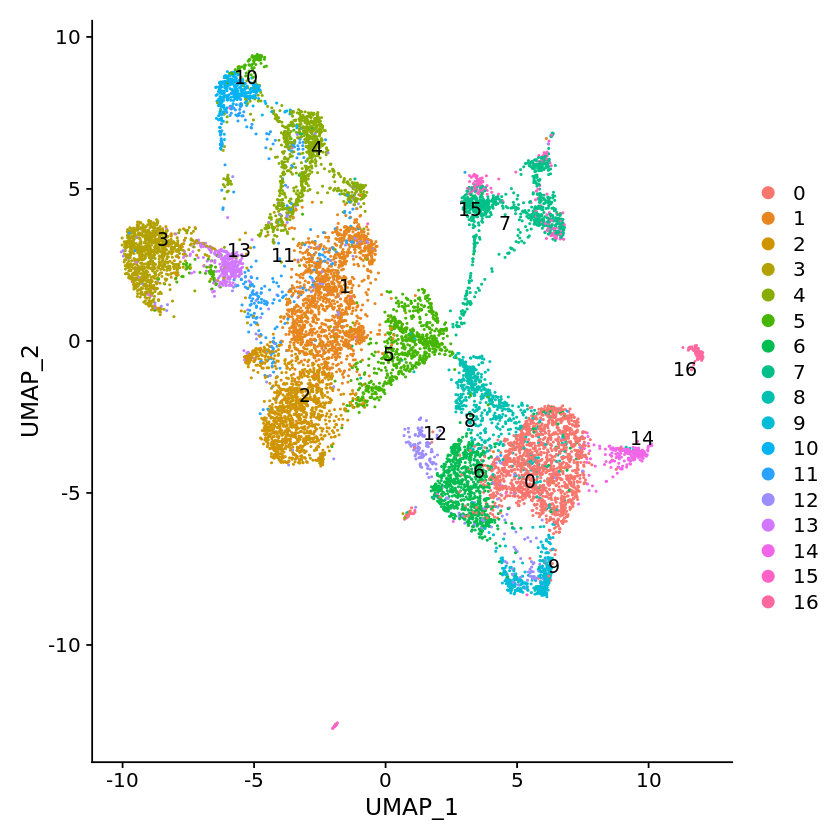

In [7]:
DimPlot(pbmc.ATAC.res$ATAC, label = TRUE, pt.size = 0.2, repel = T)

In [ ]:
# pbmc.ATAC.res$ATAC@reductions$umap@cell.embeddings

In [ ]:
# DimPlot(pbmc.ATAC.res$ATAC, label = TRUE, pt.size = 0.2, repel = T, group.by='assign.ident')

In [8]:
pbmc.ATAC.singlecellexperiment <- as.SingleCellExperiment(pbmc.ATAC.res$ATAC)

In [9]:
saveRDS(pbmc.ATAC.singlecellexperiment,'example/PBMC/pbmc_ATAC_singlecellexperiment.rds')

### chromVAR running

In [ ]:
pbmc10x_chromVAR <- RunchromVAR(pbmc_10X_inputMat)

In [ ]:
# pbmc10x_chromVAR would have 3 keys: dev,variability,zscore
plotVariability(pbmc10x_chromVAR$variability, use_plotly = T) 

In [ ]:
qsave(pbmc10x_chromVAR, "10X_ATAC/per_50_cell_peak/1k_TF_index/run_chromVAR_result.qs")

In [50]:
pbmc10x_chromVAR <- qread("10X_ATAC/per_50_cell_peak/1k_TF_index/run_chromVAR_result.qs")

In [51]:
TFlist <- head(pbmc10x_chromVAR$variability[order(pbmc10x_chromVAR$variability['variability'], decreasing=T),],5)$name
z_frame <- t(pbmc10x_chromVAR$zscore)

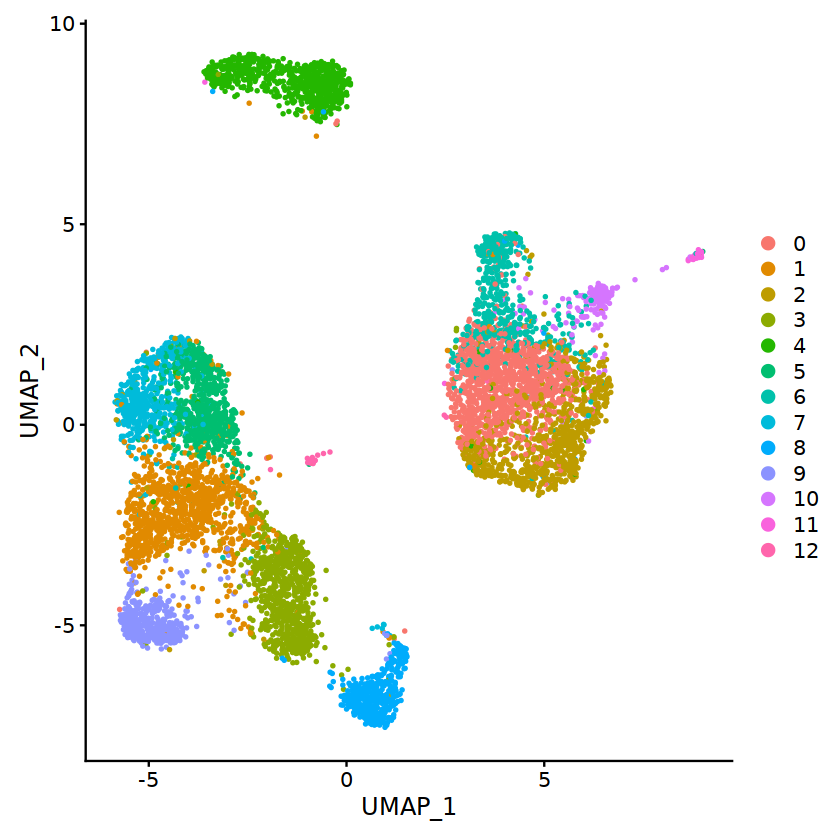

In [52]:
seurat_rds <- readRDS('10X_ATAC/analysis/atac_pbmc_10k_v1_S1_L001/Result/Analysis/atac_pbmc_10k_v1_S1_L001_scATAC_Object.rds')
chromVarResult <- mergeChromVarResult(seurat_rds, z_frame)

In [ ]:
chromVarResult$ATAC@meta.data

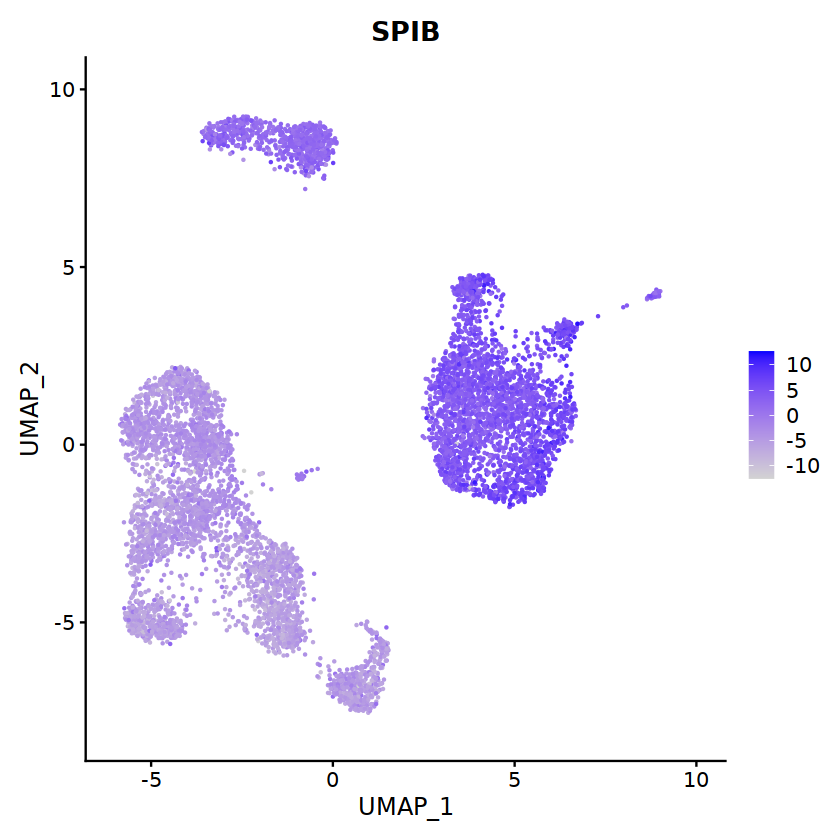

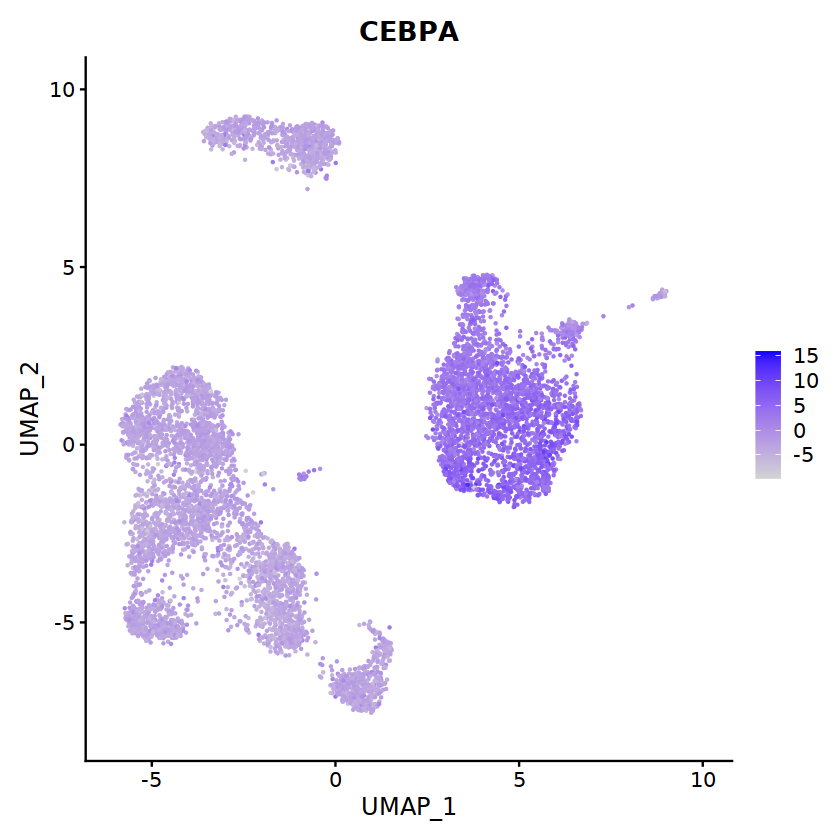

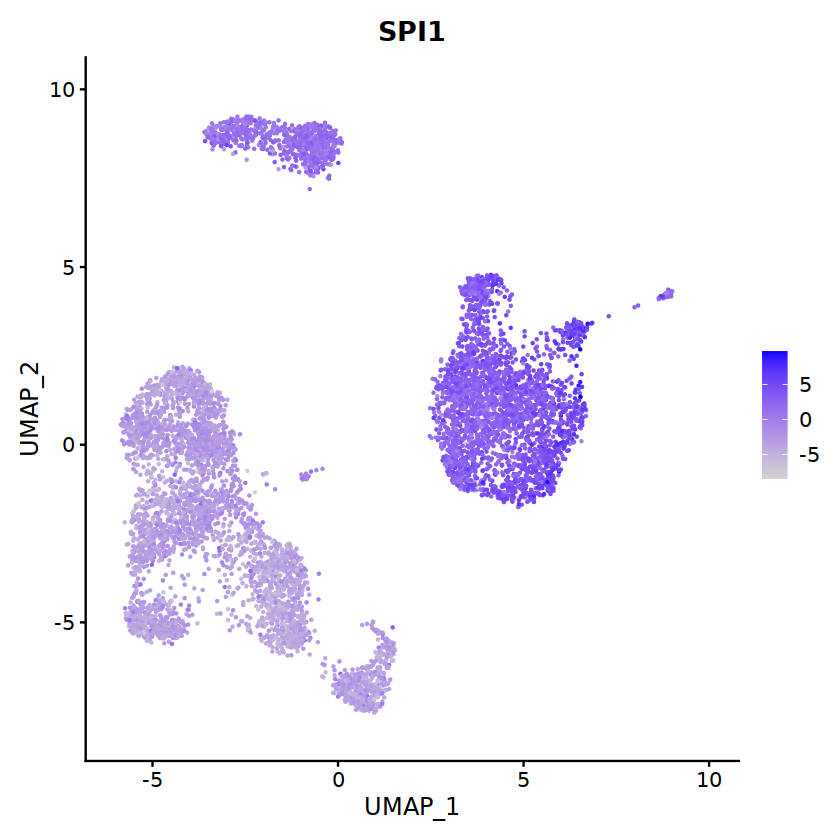

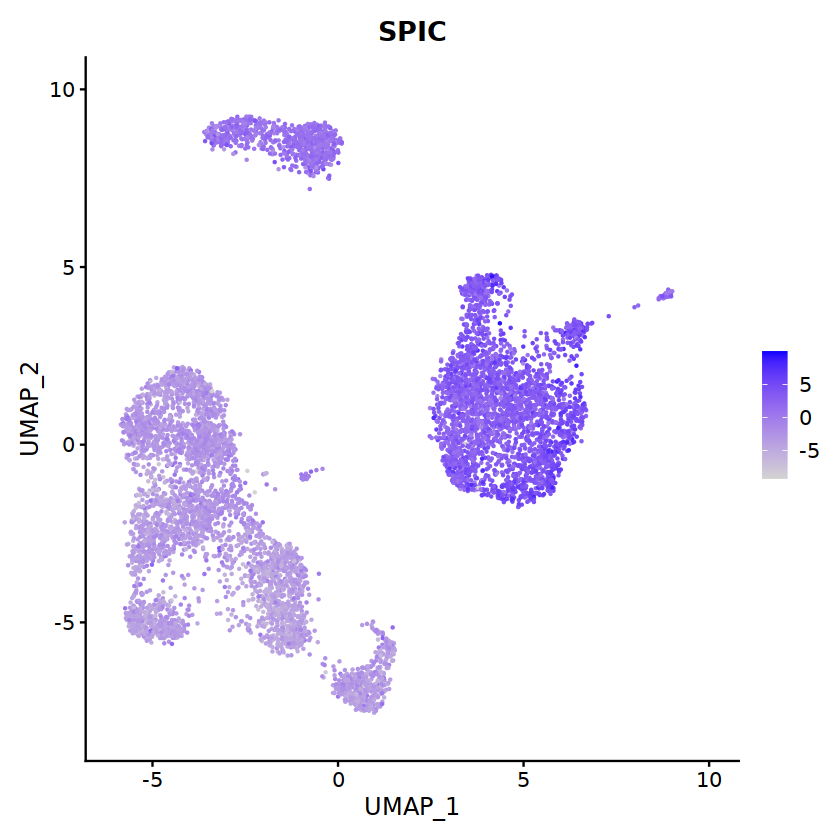

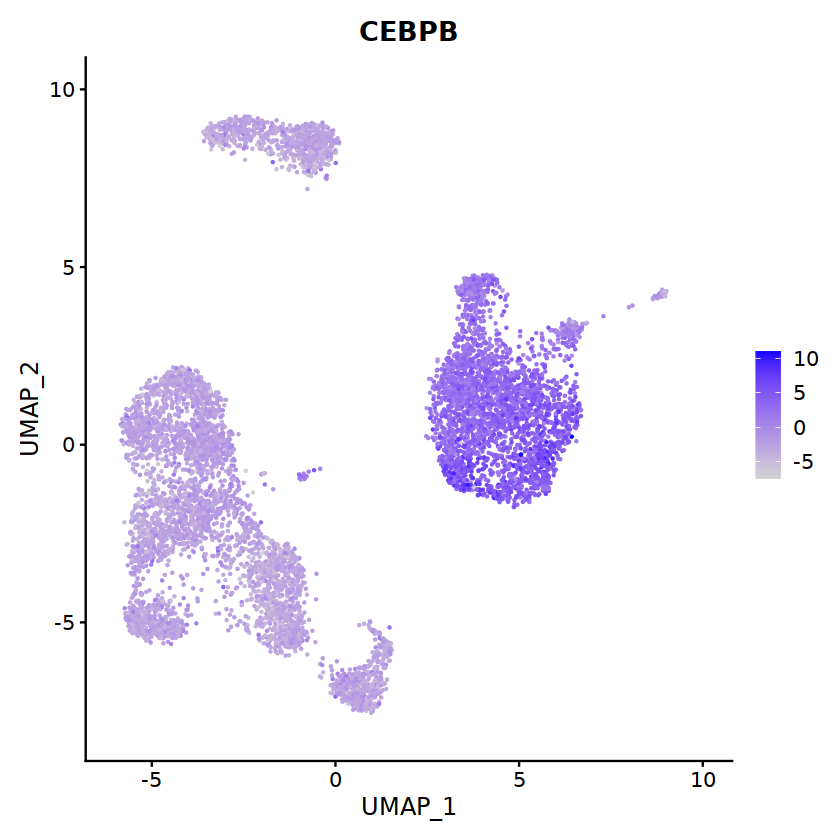

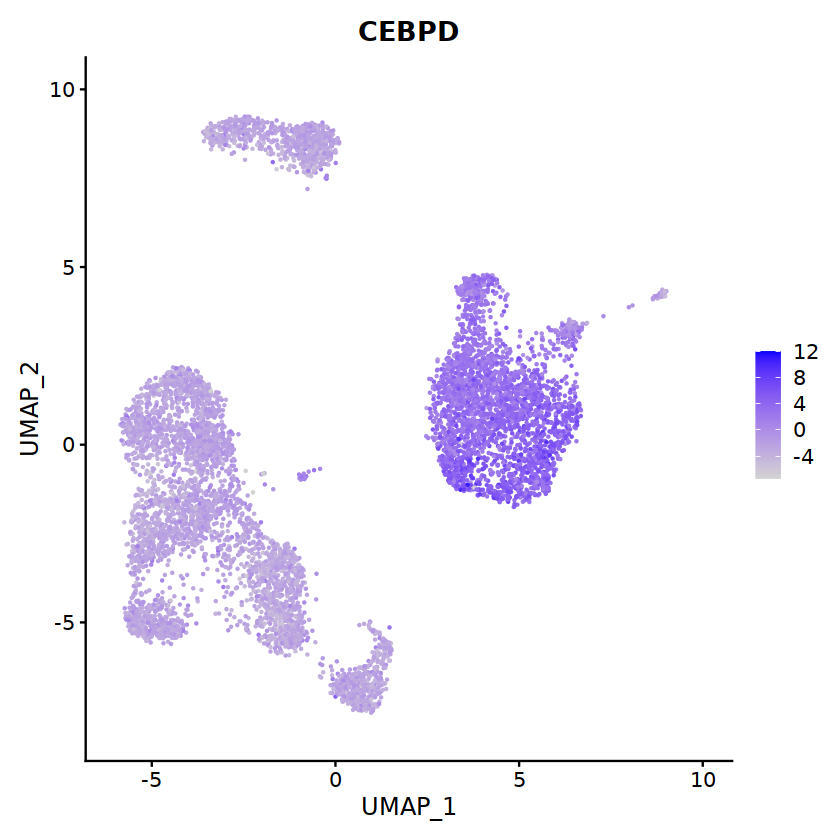

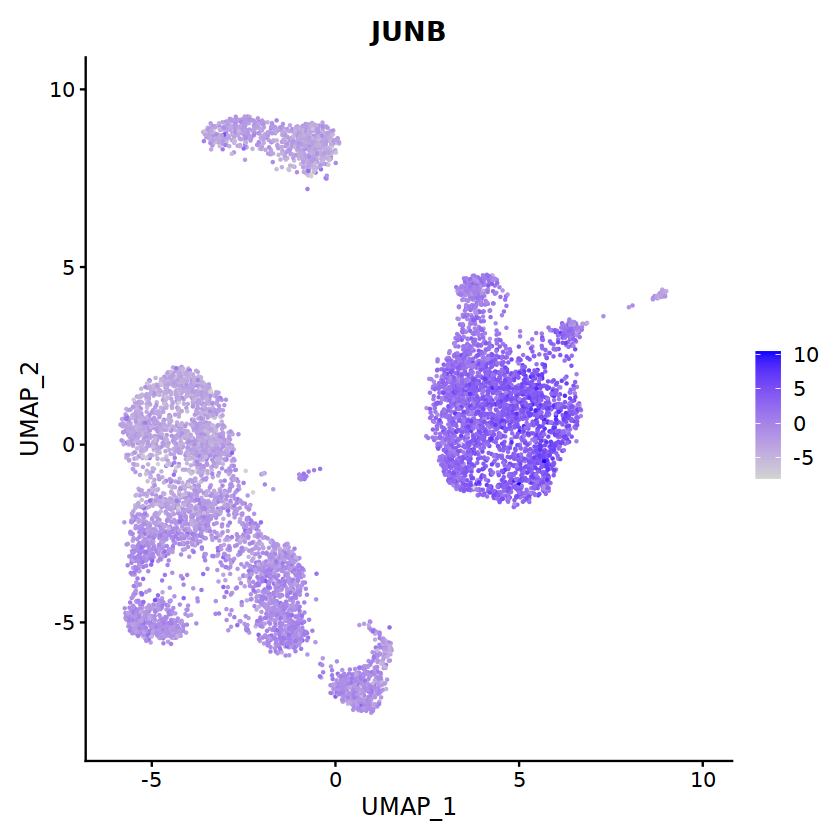

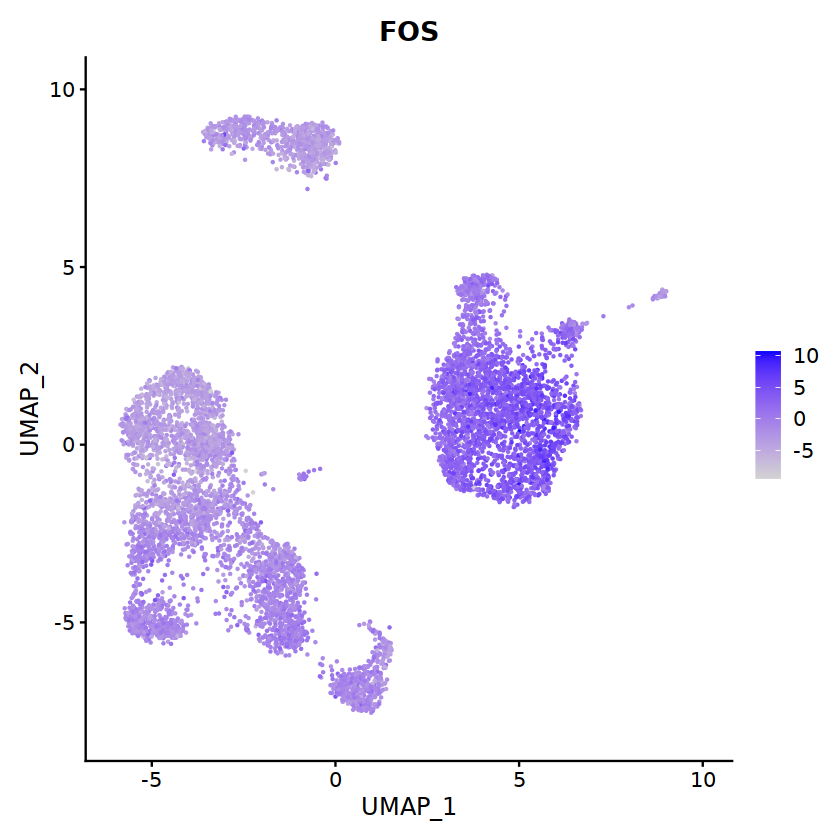

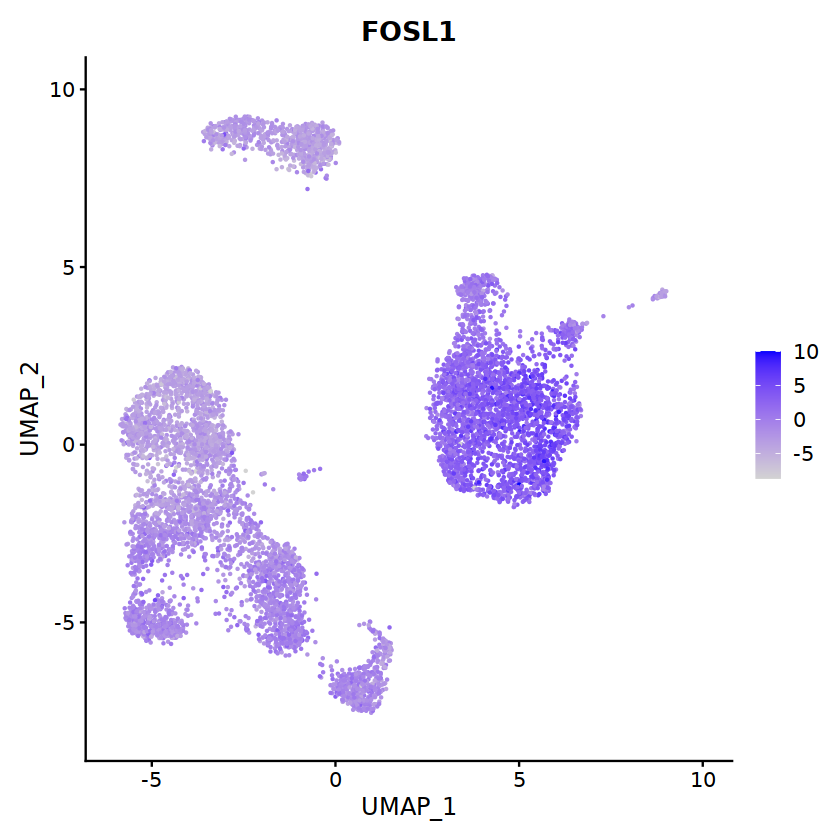

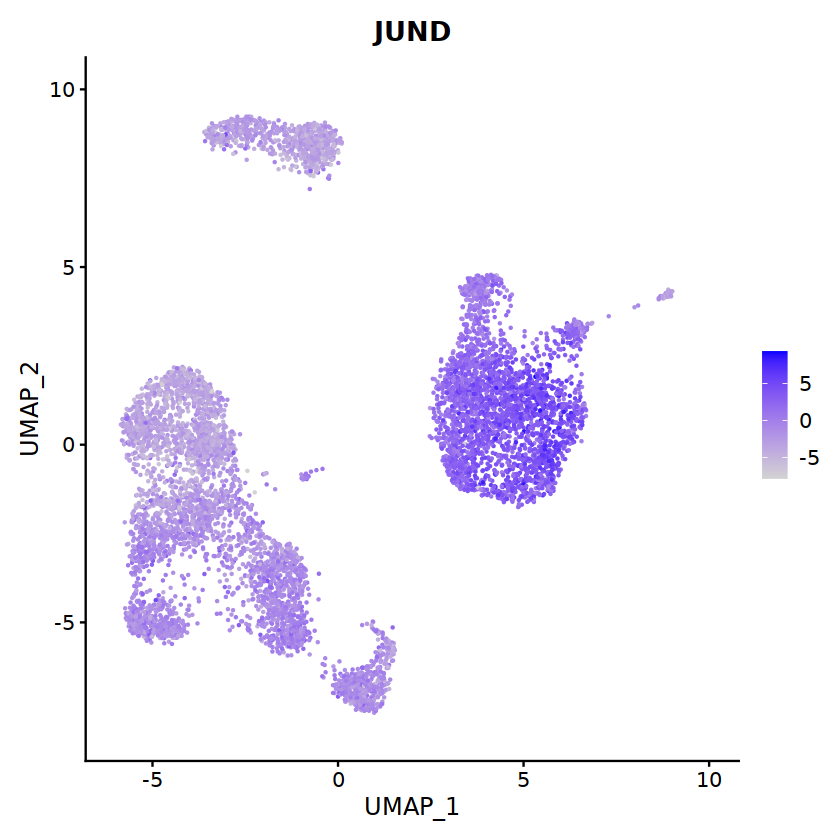

In [49]:
for (i in TFlist) {
    fig <- FeaturePlot(object = chromVarResult$ATAC, feature=i)
    show(fig)
}

In [ ]:
# tmp.path <- "10X_ATAC/chromVAR_result_more_motif.rds"
# tmp <- readRDS(tmp.path)
# qsave(tmp, str_replace(tmp.path, ".rds", ".qs"))

In [ ]:
qsave(chromVarResult, "10X_ATAC/chromVAR_result_more_motif.qs")

In [2]:
chromVarResult <- qread("example/10X_ATAC/chromVAR_result_more_motif.qs")

In [6]:
write.table(chromVarResult$z,'example/10X_ATAC/chromVar_result_table.txt', quote=FALSE, sep='\t')